# 1. Extract: Import libraries and load datasets
- Import Python libraries
- Load StatsBomb data:
    - Load 'competitions.json' into a dataframe and inspect the first few lines

### 1a. Import & analyze COMPETITIONS

In [1]:
import pandas as pd
import numpy as np
import json
import random
import matplotlib, seaborn as sns
from matplotlib import pyplot as plt
import matplotlib_inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.linear_model import LogisticRegression, Ridge, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


%matplotlib inline

In [2]:
with open(".\\data\\competitions.json", 'r') as datafile:
    data = json.load(datafile)
competitions = pd.DataFrame(data)

#### Explore the data set

In [3]:
competitions.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882


In [4]:
print("Total number of competitions:",competitions['competition_id'].count())

Total number of competitions: 74


In [5]:
competitions["competition_name"].groupby(competitions["competition_name"]).count()

competition_name
1. Bundesliga               2
African Cup of Nations      1
Champions League           18
Copa America                1
Copa del Rey                3
FA Women's Super League     3
FIFA U20 World Cup          1
FIFA World Cup              8
Indian Super league         1
La Liga                    18
Liga Profesional            2
Ligue 1                     3
Major League Soccer         1
NWSL                        1
North American League       1
Premier League              2
Serie A                     2
UEFA Euro                   2
UEFA Europa League          1
UEFA Women's Euro           1
Women's World Cup           2
Name: competition_name, dtype: int64

In [6]:
competitions[["competition_name", "season_name"]]#.head(70)

,competition_name,season_name
0,1. Bundesliga,2023/2024
1,1. Bundesliga,2015/2016
2,African Cup of Nations,2023
3,Champions League,2018/2019
4,Champions League,2017/2018
...,...,...
69,UEFA Euro,2020
70,UEFA Europa League,1988/1989
71,UEFA Women's Euro,2022
72,Women's World Cup,2023


In [7]:
competitions[competitions['competition_name'] == "UEFA Euro"].sort_values(by=['season_name'])

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
68,55,282,Europe,UEFA Euro,male,False,True,2024,2024-07-15T15:48:50.315500,2024-07-15T15:52:24.778809,2024-07-15T15:52:24.778809,2024-07-15T15:48:50.315500


In [8]:
competitions[competitions['competition_name'] == "Champions League"].sort_values(by=['season_name'])

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
20,16,276,Europe,Champions League,male,False,False,1970/1971,2024-02-13T14:24:12.213582,None,None,2024-02-13T14:24:12.213582
19,16,71,Europe,Champions League,male,False,False,1971/1972,2024-02-12T14:25:01.735880,2021-06-13T16:17:31.694,None,2024-02-12T14:25:01.735880
18,16,277,Europe,Champions League,male,False,False,1972/1973,2024-02-13T14:25:16.532771,None,None,2024-02-13T14:25:16.532771
17,16,76,Europe,Champions League,male,False,False,1999/2000,2020-07-29T05:00,2021-06-13T16:17:31.694,None,2020-07-29T05:00
16,16,44,Europe,Champions League,male,False,False,2003/2004,2024-02-12T13:51:22.366380,2021-06-13T16:17:31.694,None,2024-02-12T13:51:22.366380
15,16,37,Europe,Champions League,male,False,False,2004/2005,2024-02-12T13:09:19.665986,2021-06-13T16:17:31.694,None,2024-02-12T13:09:19.665986
14,16,39,Europe,Champions League,male,False,False,2006/2007,2024-02-12T13:48:23.967222,2021-06-13T16:17:31.694,None,2024-02-12T13:48:23.967222
13,16,41,Europe,Champions League,male,False,False,2008/2009,2024-02-13T07:02:54.657056,2021-06-13T16:17:31.694,None,2024-02-13T07:02:54.657056
12,16,21,Europe,Champions League,male,False,False,2009/2010,2024-02-12T12:49:25.017694,2021-06-13T16:17:31.694,None,2024-02-12T12:49:25.017694
11,16,22,Europe,Champions League,male,False,False,2010/2011,2024-02-12T12:53:03.944320,2021-06-13T16:17:31.694,None,2024-02-12T12:53:03.944320


### 1b. Load and analyze MATCHES of specific competitions (La Liga 2019/20, World Cup 2022, Copa America 2024)

In [9]:
def load_matches(comp_id, seas_id):
    '''
    Open JSON file for specific season (seas_id) of specific competition (comp_id) and import the matches into Pandas DataFrame.
    The data to be imported needs to be available at the \data\matches\{comp_id} subfolder, with filename {seas_id}.json
    
    Parameters:
    IN:
    - comp_id: The ID of the competition
    - seas_id: The ID of the season of the competition
    
    OUT:
    - matches: the Pandas DataFrame with the imported matches
    '''
    # Open file for specific season (seas_id) of specific competition (comp_id):
    with open('.\\data\\matches\\{comp}\\{seas}.json'.format(comp=comp_id, seas=seas_id), 'r', encoding='utf-8') as datafile:
        data = json.load(datafile)
    matches = pd.json_normalize(data) # Normalizes json file, especially concerning the nested dicts in some columns!
    
    return matches

In [10]:
competitions[competitions['competition_name'] == "La Liga"].sort_values(by=['season_name'])

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
55,11,278,Spain,La Liga,male,False,False,1973/1974,2023-07-06T12:50:48.807820,None,None,2023-07-06T12:50:48.807820
54,11,37,Spain,La Liga,male,False,False,2004/2005,2023-11-29T10:56:10.031508,2021-06-13T16:17:31.694,None,2023-11-29T10:56:10.031508
53,11,38,Spain,La Liga,male,False,False,2005/2006,2022-07-03T12:34:31.749038,2021-06-13T16:17:31.694,None,2022-07-03T12:34:31.749038
52,11,39,Spain,La Liga,male,False,False,2006/2007,2023-03-26T23:19:39.125951,2021-06-13T16:17:31.694,None,2023-03-26T23:19:39.125951
51,11,40,Spain,La Liga,male,False,False,2007/2008,2023-04-19T10:42:35.284291,2021-06-13T16:17:31.694,None,2023-04-19T10:42:35.284291
50,11,41,Spain,La Liga,male,False,False,2008/2009,2023-04-19T10:46:29.203565,2021-06-13T16:17:31.694,None,2023-04-19T10:46:29.203565
49,11,21,Spain,La Liga,male,False,False,2009/2010,2023-11-29T10:55:10.039117,2021-06-13T16:17:31.694,None,2023-11-29T10:55:10.039117
48,11,22,Spain,La Liga,male,False,False,2010/2011,2023-04-19T10:48:44.079830,2021-06-13T16:17:31.694,None,2023-04-19T10:48:44.079830
47,11,23,Spain,La Liga,male,False,False,2011/2012,2022-12-01T14:10:17.791769,2021-06-13T16:17:31.694,None,2022-12-01T14:10:17.791769
46,11,24,Spain,La Liga,male,False,False,2012/2013,2024-03-10T11:24:05.201066,2021-06-13T16:17:31.694,None,2024-03-10T11:24:05.201066


In [11]:
comp = competitions[(competitions["competition_name"] == "La Liga") & (competitions["season_name"] == "2019/2020")][["competition_id", "season_id", "season_name"]]
comp_id = int(comp.iloc[0]['competition_id'])
comp_id

11

In [12]:
seas_id = int(comp.iloc[0]['season_id'])
seas_id

42

In [15]:
matches = pd.DataFrame()

# 1. Load matches of La Liga, Season 2019/2020:
comp = competitions[(competitions["competition_name"] == "La Liga") & (competitions["season_name"] == "2019/2020")][["competition_id", "season_id", "season_name"]]
comp_id = int(comp.iloc[0]['competition_id'])
seas_id = int(comp.iloc[0]['season_id'])
imported_matches = load_matches(comp_id, seas_id)
matches = matches.append(imported_matches, ignore_index=True)

# 2. Load matches of UEFA Euro 2024:
comp = competitions[(competitions["competition_name"] == "UEFA Euro") & (competitions["season_name"] == "2024")][["competition_id", "season_id", "season_name"]]
comp_id = int(comp.iloc[0]['competition_id'])
seas_id = int(comp.iloc[0]['season_id'])
imported_matches = load_matches(comp_id, seas_id)
matches = matches.append(imported_matches, ignore_index=True)

# 3. Load matches of Copa America 2024:
comp = competitions[(competitions["competition_name"] == "Copa America") & (competitions["season_name"] == "2024")][["competition_id", "season_id", "season_name"]]
comp_id = int(comp.iloc[0]['competition_id'])
seas_id = int(comp.iloc[0]['season_id'])
imported_matches = load_matches(comp_id, seas_id)
matches = matches.append(imported_matches, ignore_index=True)

In [16]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   match_id                        116 non-null    int64  
 1   match_date                      116 non-null    object 
 2   kick_off                        116 non-null    object 
 3   home_score                      116 non-null    int64  
 4   away_score                      116 non-null    int64  
 5   match_status                    116 non-null    object 
 6   match_status_360                116 non-null    object 
 7   last_updated                    116 non-null    object 
 8   last_updated_360                84 non-null     object 
 9   match_week                      116 non-null    int64  
 10  competition.competition_id      116 non-null    int64  
 11  competition.country_name        116 non-null    object 
 12  competition.competition_name    116 

In [17]:
matches.sort_values(by="match_date")[["match_id", "match_week", "match_date", "home_team.home_team_name", "away_team.away_team_name", "home_score", "away_score"]]

,match_id,match_week,match_date,home_team.home_team_name,away_team.away_team_name,home_score,away_score
26,303666,5,2019-09-21,Granada,Barcelona,2,0
4,303430,6,2019-09-24,Barcelona,Villarreal,2,1
32,303473,8,2019-10-06,Barcelona,Sevilla,4,0
24,303700,9,2019-10-19,Eibar,Barcelona,0,3
19,303600,11,2019-10-29,Barcelona,Real Valladolid,5,1
...,...,...,...,...,...,...,...
87,3942785,5,2024-07-10,Argentina,Canada,2,0
86,3942852,5,2024-07-11,Uruguay,Colombia,0,1
85,3943076,6,2024-07-14,Canada,Uruguay,2,2
34,3943043,7,2024-07-14,Spain,England,2,1


In [18]:
# 1c. Load and analyze EVENTS of specific matches
# Open files for specific CL season:
#with open('.\data\events\match303731.json', 'r', encoding='utf-8') as datafile:
matches.sort_values(by="match_date", ascending=True)[["match_id", "match_week", "match_date", "home_team.home_team_name", "away_team.away_team_name", "home_score", "away_score"]].head(50)
i = 1
for match_idx in matches.sort_values(by="match_date", ascending=True)["match_id"]:
    print(i,". Importing events of match", match_idx)
    with open('.\\data\\events\\{match}.json'.format(match=match_idx), 'r', encoding='utf-8') as datafile:
        data = json.load(datafile)
        ev_imp = pd.json_normalize(data) # Normalizes json file, especially concerning the nested dicts in some columns!
        ev_imp['match_id'] = match_idx # Add match_id in separate row, for identification when multiple matches are imported
        if (i == 1):
            events = ev_imp 
        else:
            events = pd.concat([events, ev_imp]) 
    i += 1

print("Import of",len(events),"events of",len(matches),"matches completed!")

1 . Importing events of match 303666
2 . Importing events of match 303430
3 . Importing events of match 303473
4 . Importing events of match 303700
5 . Importing events of match 303600
6 . Importing events of match 303504
7 . Importing events of match 303487
8 . Importing events of match 303715
9 . Importing events of match 303524
10 . Importing events of match 303451
11 . Importing events of match 303664
12 . Importing events of match 303596
13 . Importing events of match 303517
14 . Importing events of match 303652
15 . Importing events of match 303610
16 . Importing events of match 303400
17 . Importing events of match 303682
18 . Importing events of match 303707
19 . Importing events of match 303377
20 . Importing events of match 303731
21 . Importing events of match 303470
22 . Importing events of match 303479
23 . Importing events of match 303548
24 . Importing events of match 303532
25 . Importing events of match 303674
26 . Importing events of match 303493
27 . Importing events

#### Explore the events data:

In [19]:
events.shape

(417221, 143)

In [20]:
events.head()

,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,...,clearance.other,block.save_block,ball_recovery.offensive,goalkeeper.shot_saved_to_post,goalkeeper.success_in_play,shot.saved_to_post,shot.redirect,shot.follows_dribble,goalkeeper.penalty_saved_to_post,player_off.permanent
0,58ca2054-76f8-4813-9419-48eea9bef911,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5575a4ef-f319-4e42-8b9a-69a2d190df13,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21ca78e9-70a3-4023-9f2e-8407159c9daa,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,046a25c4-aca8-4612-bf5e-b4266378ec43,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,185676a8-de92-4436-9d7b-bc85e5e82487,5,1,00:00:01.783,0,1,2,0.794397,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
events.columns.values

array(['id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'duration', 'type.id', 'type.name',
       'possession_team.id', 'possession_team.name', 'play_pattern.id',
       'play_pattern.name', 'team.id', 'team.name', 'tactics.formation',
       'tactics.lineup', 'related_events', 'location', 'player.id',
       'player.name', 'position.id', 'position.name', 'pass.recipient.id',
       'pass.recipient.name', 'pass.length', 'pass.angle',
       'pass.height.id', 'pass.height.name', 'pass.end_location',
       'pass.body_part.id', 'pass.body_part.name', 'pass.type.id',
       'pass.type.name', 'carry.end_location', 'under_pressure',
       'pass.outcome.id', 'pass.outcome.name', 'ball_receipt.outcome.id',
       'ball_receipt.outcome.name', 'counterpress', 'duel.type.id',
       'duel.type.name', 'pass.aerial_won', 'off_camera',
       'foul_committed.type.id', 'foul_committed.type.name',
       'ball_recovery.recovery_failure', 'shot.open_goal',
       'shot.

In [22]:
events[['pass.recipient.id',
       'pass.recipient.name', 'pass.length', 'pass.angle',
       'pass.height.id', 'pass.height.name', 'pass.end_location',
       'pass.body_part.id', 'pass.body_part.name', 'pass.type.id',
       'pass.type.name', 'carry.end_location', 'under_pressure',
       'pass.outcome.id', 'pass.outcome.name', 'ball_receipt.outcome.id',
       'ball_receipt.outcome.name', 'counterpress', 'duel.type.id',
       'duel.type.name', 'pass.aerial_won', 'off_camera',
       'foul_committed.type.id', 'foul_committed.type.name',
       'ball_recovery.recovery_failure', 'shot.open_goal',
       'shot.statsbomb_xg', 'shot.end_location', 'shot.body_part.id',
       'shot.body_part.name', 'shot.type.id', 'shot.type.name',
       'shot.outcome.id', 'shot.outcome.name', 'shot.technique.id',
       'shot.technique.name', 'shot.freeze_frame',
       'goalkeeper.position.id', 'goalkeeper.position.name',
       'goalkeeper.type.id', 'goalkeeper.type.name',
       'goalkeeper.outcome.id', 'goalkeeper.outcome.name',
       'goalkeeper.technique.id', 'goalkeeper.technique.name',
       'clearance.head', 'clearance.body_part.id',
       'clearance.body_part.name', 'pass.through_ball',
       'pass.technique.id', 'pass.technique.name', 'clearance.aerial_won',
       'pass.switch', 'interception.outcome.id',
       'interception.outcome.name', 'duel.outcome.id',
       'duel.outcome.name', 'dribble.outcome.id', 'dribble.outcome.name',
       'pass.inswinging', 'pass.cross', 'clearance.left_foot',
       'pass.assisted_shot_id', 'pass.shot_assist', 'shot.key_pass_id',
       'shot.saved_off_target', 'goalkeeper.body_part.id',
       'goalkeeper.body_part.name', 'goalkeeper.shot_saved_off_target',
       'pass.outswinging', 'clearance.right_foot', 'out',
       'goalkeeper.end_location', 'block.offensive',
       'foul_committed.card.id', 'foul_committed.card.name',
       'foul_won.defensive', 'dribble.overrun', 'shot.aerial_won',
       'dribble.nutmeg', 'pass.deflected', 'shot.first_time',
       'pass.miscommunication', 'block.deflection',
       'foul_committed.advantage', 'foul_won.advantage',
       'bad_behaviour.card.id', 'bad_behaviour.card.name',
       'pass.cut_back', 'substitution.outcome.id',
       'substitution.outcome.name', 'substitution.replacement.id',
       'substitution.replacement.name', 'foul_committed.penalty',
       'dribble.no_touch', 'pass.no_touch', 'foul_committed.offensive',
       '50_50.outcome.id', '50_50.outcome.name', 'match_id',
       'shot.one_on_one', 'pass.goal_assist', 'miscontrol.aerial_won',
       'goalkeeper.punched_out', 'goalkeeper.lost_in_play',
       'injury_stoppage.in_chain', 'shot.deflected', 'pass.straight',
       'foul_won.penalty', 'clearance.other', 'block.save_block',
       'ball_recovery.offensive', 'goalkeeper.shot_saved_to_post',
       'goalkeeper.success_in_play', 'shot.saved_to_post',
       'shot.redirect', 'shot.follows_dribble',
       'goalkeeper.penalty_saved_to_post', 'player_off.permanent']].shape #.columns.values

(417221, 119)

In [23]:
events.value_counts(subset=["play_pattern.id", "play_pattern.name"])

play_pattern.id  play_pattern.name
1                Regular Play         175188
4                From Throw In         92072
3                From Free Kick        68334
7                From Goal Kick        32727
2                From Corner           15741
9                From Kick Off         15070
8                From Keeper           12416
6                From Counter           3268
5                Other                  2405
dtype: int64

# 2. Transform: Data Preprocessing

In [24]:
def init_stats_columns(event_type, verbose=0):
    '''
    Function to prepare the import of the events of a specific event type.
    Respective columns for home and away time are created in the matches dataframe and initialized with zero values.
    
    Parameters:
    IN:
    - event_type: (string) The name of the event type
    - verbose: (int) Determine if informational message should be printed (when set to >0) or not (when set to 0)
    
    OUT:
    Nothing, just imports all events of the given event_type
    '''
    
    # Create additional column in MATCHES for statistics extracted later on out of EVENTS:
    home_event_type = "home_" + event_type
    away_event_type = "away_" + event_type
    matches[home_event_type] = 0 # Initialize with zeros - in case home team did not perform any events of this type, a zero is correct (otherwise, it will be updated later on)
    matches[away_event_type] = 0 # Initialize with zeros - in away home team did not perform any events of this type, a zero is correct (otherwise, it will be updated later on)
    
    if (verbose > 0):
        print("Init of stats columns",event_type,":\n",matches.sort_values(by="match_date")[["match_id", "home_team.home_team_name", "away_team.away_team_name", "home_score", "away_score", "home_"+event_type, "away_"+event_type]]) #, "match_week", "match_date"
    
    return


def update_match_stats(event_type, verbose=0):
    '''
    Imports the match statistics of a given event type by counting the number of occurrences of this event type in a match.
    Add the team-specific recorded number of events to two columns (home_<event_type>, away_<event_type>) in the match dataframe 
    
    Parameters:
    IN:
    - event_type: (string) The name of the event type
    - verbose: (int) Determine if informational message should be printed (when set to >0) or not (when set to 0)
    
    OUT:
    Nothing, just imports the match statistics of a given event
    '''
    
    home_event_type = "home_" + event_type
    away_event_type = "away_" + event_type
    
    event_df = events[(events[event_type].notnull())][["match_id", "possession_team.name", event_type]]
    if (verbose > 1):
        print("Events of type",event_type,":\n",event_df)
    if (verbose > 0):
        print("There are",event_df.shape[0],"cumulated events of type",event_type,"\n")
        
    # Now update match statistics in home/away columns for each event of this type:
    event = event_df.value_counts(subset=["match_id", "possession_team.name"], sort=True)
    for event_id in range(len(event)):
        this_match_id = event.index[event_id][0]
        this_team_name = event.index[event_id][1]
        this_event_count = event.iloc[event_id]
        for match in matches["match_id"]:
            if (match == this_match_id):
                # Update statistics for this team in matches dataframe:
                # Find out if team is home_team or away_team:
                home_team = matches[matches["match_id"] == match]["home_team.home_team_name"].iloc[0]
                away_team = matches[matches["match_id"] == match]["away_team.away_team_name"].iloc[0]
                if (this_team_name == home_team):
                    # Update cell value of home_shot.first_time of this match in matches table:
                    matches.loc[matches["match_id"] == this_match_id, [home_event_type]] = this_event_count
                elif(this_team_name == away_team):
                    # Update cell value of away_shot.firt_time of this match in matches table:
                    matches.loc[matches["match_id"] == this_match_id, [away_event_type]] = this_event_count
                else:
                    print("Error in team association!")
                break
    return

In [25]:
# Step 1: Investigate shot specific columns, starting with "shot.":
shot_columns = ['shot.open_goal', 'shot.statsbomb_xg', 
       'shot.freeze_frame', 'shot.saved_to_post', 'shot.redirect',
       'shot.key_pass_id', 'shot.saved_off_target', 'shot.aerial_won',
       'shot.first_time', 'shot.one_on_one', 'shot.deflected']
shot_columns

['shot.open_goal',
 'shot.statsbomb_xg',
 'shot.freeze_frame',
 'shot.saved_to_post',
 'shot.redirect',
 'shot.key_pass_id',
 'shot.saved_off_target',
 'shot.aerial_won',
 'shot.first_time',
 'shot.one_on_one',
 'shot.deflected']

In [26]:
# Step 2: Investigate shot specific columns, starting with "pass.":
pass_columns = events.filter(like="pass.").columns.values
pass_columns = [
        'pass.length',
        'pass.outcome.name',
        'pass.aerial_won', 
        'pass.through_ball',        
        'pass.switch',
        'pass.inswinging', 
        'pass.cross',     
        'pass.shot_assist',
        'pass.outswinging', 
        'pass.deflected',
        'pass.miscommunication', 
        'pass.cut_back', 
        'pass.no_touch', 
        'pass.straight']
pass_columns

['pass.length',
 'pass.outcome.name',
 'pass.aerial_won',
 'pass.through_ball',
 'pass.switch',
 'pass.inswinging',
 'pass.cross',
 'pass.shot_assist',
 'pass.outswinging',
 'pass.deflected',
 'pass.miscommunication',
 'pass.cut_back',
 'pass.no_touch',
 'pass.straight']

In [28]:
sorted(events.columns.values)

['50_50.outcome.id',
 '50_50.outcome.name',
 'bad_behaviour.card.id',
 'bad_behaviour.card.name',
 'ball_receipt.outcome.id',
 'ball_receipt.outcome.name',
 'ball_recovery.offensive',
 'ball_recovery.recovery_failure',
 'block.deflection',
 'block.offensive',
 'block.save_block',
 'carry.end_location',
 'clearance.aerial_won',
 'clearance.body_part.id',
 'clearance.body_part.name',
 'clearance.head',
 'clearance.left_foot',
 'clearance.other',
 'clearance.right_foot',
 'counterpress',
 'dribble.no_touch',
 'dribble.nutmeg',
 'dribble.outcome.id',
 'dribble.outcome.name',
 'dribble.overrun',
 'duel.outcome.id',
 'duel.outcome.name',
 'duel.type.id',
 'duel.type.name',
 'duration',
 'foul_committed.advantage',
 'foul_committed.card.id',
 'foul_committed.card.name',
 'foul_committed.offensive',
 'foul_committed.penalty',
 'foul_committed.type.id',
 'foul_committed.type.name',
 'foul_won.advantage',
 'foul_won.defensive',
 'foul_won.penalty',
 'goalkeeper.body_part.id',
 'goalkeeper.body_p

In [29]:
events[events['goalkeeper.body_part.id'].notnull()].groupby('goalkeeper.body_part.name').count()

,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,...,clearance.other,block.save_block,ball_recovery.offensive,goalkeeper.shot_saved_to_post,goalkeeper.success_in_play,shot.saved_to_post,shot.redirect,shot.follows_dribble,goalkeeper.penalty_saved_to_post,player_off.permanent
goalkeeper.body_part.name,,,,,,,,,,,,,,,,,,,,,
Both Hands,490,490,490,490,490,490,490,490,490,490,...,0,0,0,4,0,0,0,0,2,0
Chest,27,27,27,27,27,27,27,27,27,27,...,0,0,0,0,0,0,0,0,0,0
Head,13,13,13,13,13,13,13,13,13,13,...,0,0,0,0,0,0,0,0,0,0
Left Foot,51,51,51,51,51,51,51,51,51,51,...,0,0,0,0,0,0,0,0,0,0
Left Hand,68,68,68,68,68,68,68,68,68,68,...,0,0,0,2,0,0,0,0,0,0
Right Foot,67,67,67,67,67,67,67,67,67,67,...,0,0,0,1,0,0,0,0,0,0
Right Hand,98,98,98,98,98,98,98,98,98,98,...,0,0,0,2,0,0,0,0,0,0


In [30]:
events[events['goalkeeper.body_part.id'].notnull()][['goalkeeper.position.id', #'goalkeeper.position.name', 'goalkeeper.type.id', 'goalkeeper.type.name',
       'goalkeeper.outcome.id', #'goalkeeper.outcome.name',
       'goalkeeper.technique.id', #'goalkeeper.technique.name',
       'goalkeeper.body_part.id', 'goalkeeper.body_part.name',
       'goalkeeper.shot_saved_off_target', 'goalkeeper.end_location',
       'goalkeeper.punched_out', 'goalkeeper.lost_in_play',
       'goalkeeper.shot_saved_to_post', 'goalkeeper.success_in_play',
       'goalkeeper.penalty_saved_to_post']].head(20)

,goalkeeper.position.id,goalkeeper.outcome.id,goalkeeper.technique.id,goalkeeper.body_part.id,goalkeeper.body_part.name,goalkeeper.shot_saved_off_target,goalkeeper.end_location,goalkeeper.punched_out,goalkeeper.lost_in_play,goalkeeper.shot_saved_to_post,goalkeeper.success_in_play,goalkeeper.penalty_saved_to_post
619,44.0,59.0,45.0,35.0,Both Hands,True,NaN,NaN,NaN,NaN,NaN,NaN
2820,44.0,56.0,46.0,35.0,Both Hands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3056,44.0,56.0,45.0,35.0,Both Hands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2125,44.0,58.0,45.0,41.0,Right Hand,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2300,44.0,52.0,46.0,39.0,Left Hand,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2437,44.0,15.0,46.0,35.0,Both Hands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3053,NaN,48.0,NaN,37.0,Head,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3204,44.0,15.0,45.0,35.0,Both Hands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3963,44.0,52.0,46.0,35.0,Both Hands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,42.0,15.0,46.0,35.0,Both Hands,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Step 3: Investigate goalkeeper specific columns, starting with "goalkeeper.":
goalkeeper_columns = events.filter(like="goalkeeper.").columns.values
goalkeeper_columns = ['goalkeeper.position.id', 'goalkeeper.outcome.id', 
       'goalkeeper.technique.id', 'goalkeeper.body_part.id', 
       'goalkeeper.shot_saved_off_target', 'goalkeeper.end_location',
       'goalkeeper.punched_out', 'goalkeeper.lost_in_play',
       'goalkeeper.shot_saved_to_post', 'goalkeeper.success_in_play',
       'goalkeeper.penalty_saved_to_post']
goalkeeper_columns

['goalkeeper.position.id',
 'goalkeeper.outcome.id',
 'goalkeeper.technique.id',
 'goalkeeper.body_part.id',
 'goalkeeper.shot_saved_off_target',
 'goalkeeper.end_location',
 'goalkeeper.punched_out',
 'goalkeeper.lost_in_play',
 'goalkeeper.shot_saved_to_post',
 'goalkeeper.success_in_play',
 'goalkeeper.penalty_saved_to_post']

In [32]:
# Step 4: Investigate foul specific columns, starting with "foul":
foul_columns = events.filter(like="foul").columns.values
foul_columns = ['foul_committed.type.id', 
 'foul_committed.card.id', 
 'foul_won.defensive', 'foul_committed.advantage',
 'foul_won.advantage', 'foul_committed.penalty',
 'foul_committed.offensive', 'foul_won.penalty']
foul_columns

['foul_committed.type.id',
 'foul_committed.card.id',
 'foul_won.defensive',
 'foul_committed.advantage',
 'foul_won.advantage',
 'foul_committed.penalty',
 'foul_committed.offensive',
 'foul_won.penalty']

In [34]:
# Step 5: Investigate other specific columns (clearance, dribble, duel), starting with the respective names:
clearance_columns = events.filter(like="clearance").columns.values
dribble_columns = events.filter(like="dribble").columns.values
duel_columns = events.filter(like="duel").columns.values
misc_columns = np.concatenate((clearance_columns, dribble_columns, duel_columns))
misc_columns

['clearance.head',
 'clearance.aerial_won',
 'clearance.left_foot',
 'clearance.right_foot',
 'clearance.other',
 'dribble.outcome.id',
 'dribble.overrun',
 'dribble.nutmeg',
 'dribble.no_touch',
 'duel.type.id',
 'duel.outcome.id']

In [35]:
events[events['clearance.head'].notnull()][['clearance.head',
 'clearance.aerial_won',
 'clearance.left_foot',
 'clearance.right_foot',
 'clearance.other',
 'dribble.outcome.id',
 'dribble.overrun',
 'dribble.nutmeg',
 'dribble.no_touch',
 'duel.type.id',
 'duel.outcome.id'
    ]].head(5)

,clearance.head,clearance.aerial_won,clearance.left_foot,clearance.right_foot,clearance.other,dribble.outcome.id,dribble.overrun,dribble.nutmeg,dribble.no_touch,duel.type.id,duel.outcome.id
83,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
misc_columns = ['clearance.head', 'clearance.aerial_won',
 'clearance.left_foot', 'clearance.right_foot', 'clearance.other',
 'dribble.outcome.id', 'dribble.overrun', 'dribble.nutmeg', 'dribble.no_touch',
 'duel.type.id', 'duel.outcome.id']

In [36]:
# Build mixed-type column set of most relevant features 
# with biggest influence on win_home/win_away/win_home, 
# according to heatmap (only those were one of the 
# absolute values were at least 0.2, i.e. >=0.2 or <=-0.2)
mixed_type_columns = [# 1. 'shot' events:
                  'shot.statsbomb_xg', 'shot.freeze_frame', 'shot.key_pass_id', 
                  'shot.first_time', 'shot.one_on_one', 'shot.deflected',
                  # 2. 'pass' events:
                  'pass.length', 'pass.outcome.name', 'pass.through_ball',
                  'pass.inswinging', 'pass.shot_assist', 'pass.deflected', 
                  'pass.cut_back', 'pass.no_touch',
                  # 3. 'goalkeeper' events:
                  'goalkeeper.position.id', 'goalkeeper.outcome.id', 'goalkeeper.technique.id', 
                  'goalkeeper.body_part.id', 'goalkeeper.end_location', 'goalkeeper.punched_out', 
                  # 4. 'foul' events:
                  'foul_won.defensive', 'foul_committed.advantage', 'foul_won.advantage', 
                  'foul_committed.penalty',
                  # 5. misc events ('clearance', 'dribble', 'duel'):
                  'clearance.head', 'clearance.aerial_won', 'clearance.right_foot',
                  'dribble.outcome.id', 'duel.type.id', 'duel.outcome.id']

In [37]:
relevant_event_types = mixed_type_columns
count = 1
for event_type in relevant_event_types:
    init_stats_columns(event_type, 0)
    update_match_stats(event_type, 1)
    count += 1

There are 2882 cumulated events of type shot.statsbomb_xg 

There are 2798 cumulated events of type shot.freeze_frame 

There are 2040 cumulated events of type shot.key_pass_id 

There are 801 cumulated events of type shot.first_time 

There are 166 cumulated events of type shot.one_on_one 

There are 60 cumulated events of type shot.deflected 

There are 118920 cumulated events of type pass.length 

There are 19787 cumulated events of type pass.outcome.name 

There are 585 cumulated events of type pass.through_ball 

There are 476 cumulated events of type pass.inswinging 

There are 1863 cumulated events of type pass.shot_assist 

There are 130 cumulated events of type pass.deflected 

There are 202 cumulated events of type pass.cut_back 

There are 141 cumulated events of type pass.no_touch 

There are 2893 cumulated events of type goalkeeper.position.id 

There are 1618 cumulated events of type goalkeeper.outcome.id 

There are 1042 cumulated events of type goalkeeper.technique.id 


In [38]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Columns: 102 entries, match_id to away_duel.outcome.id
dtypes: float64(2), int64(73), object(27)
memory usage: 92.6+ KB


In [39]:
def determine_winner(home_score, away_score):
    '''
    Function to determine the winner of match based on the given scores of the home and away.
    The team which has a higher score wins, or there is a draw and no team wins 
    if both teams scored the same number of goals.
    
    Parameters:
    IN:
    - home_score: (int) The number of goals the home team scored
    - away_score: (int) The number of goals the home team scored
    
    OUT:
    - winner: (string) The winner of the match ('home', 'away' or 'none')
    '''
    if (home_score > away_score):
        winner = 'home' # victory for home team
    elif (home_score < away_score):
        winner = 'away' # victory for away team
    else:
        winner = 'none' # it´s a draw
    return winner    

In [40]:
# Init gameresult output columns with zeros:
matches["win_home"] = 0
matches["win_away"] = 0
matches["win_none"] = 0

In [41]:
def update_gameresult_columns(match_id):
    '''
    Function to one-hot-encode gameresult columns for ML classifiers.
    ("win_home" - home team wins; "win_away" - away team wins; "win_none" - no teanm wins, i.e. it´s a draw
    Values are binary, i.e., they can be 1 (if true) or 0 (if wrong)
    
    Parameters:
    IN:
    - match_id (int): The ID of the match for which the output columns should be set
    
    OUT:
    Nothing, as the function directly updates the respective cells in the matches dataframe
    '''
    home_score = matches[matches["match_id"] == match_id]["home_score"].iloc[0]
    away_score = matches[matches["match_id"] == match_id]["away_score"].iloc[0]
    winner = determine_winner(home_score, away_score)
    if (winner == 'home'):
        matches.loc[matches["match_id"] == match_id, ["win_home"]] = 1
        matches.loc[matches["match_id"] == match_id, ["win_away", "win_none"]] = 0
    elif (winner == 'away'):
        matches.loc[matches["match_id"] == match_id, ["win_away"]] = 1
        matches.loc[matches["match_id"] == match_id, ["win_home", "win_none"]] = 0
    else:
        matches.loc[matches["match_id"] == match_id, ["win_none"]] = 1
        matches.loc[matches["match_id"] == match_id, ["win_home", "win_away"]] = 0
        
    return

In [42]:
# Determine winners and update gameresult columns:
for match in matches["match_id"]:
    update_gameresult_columns(match)

In [43]:
# Test outputs:
matches[["match_id", "home_score", "away_score", "win_home", "win_none", "win_away"]].tail(5)

,match_id,home_score,away_score,win_home,win_none,win_away
111,3939974,2,0,1,0,0
112,3939972,1,2,0,0,1
113,3939971,1,0,1,0,0
114,3939970,0,0,0,1,0
115,3939969,2,0,1,0,0


In [44]:
matches[["match_id", "home_score", "away_score", "win_home", "win_none", "win_away"]].shape

(116, 6)

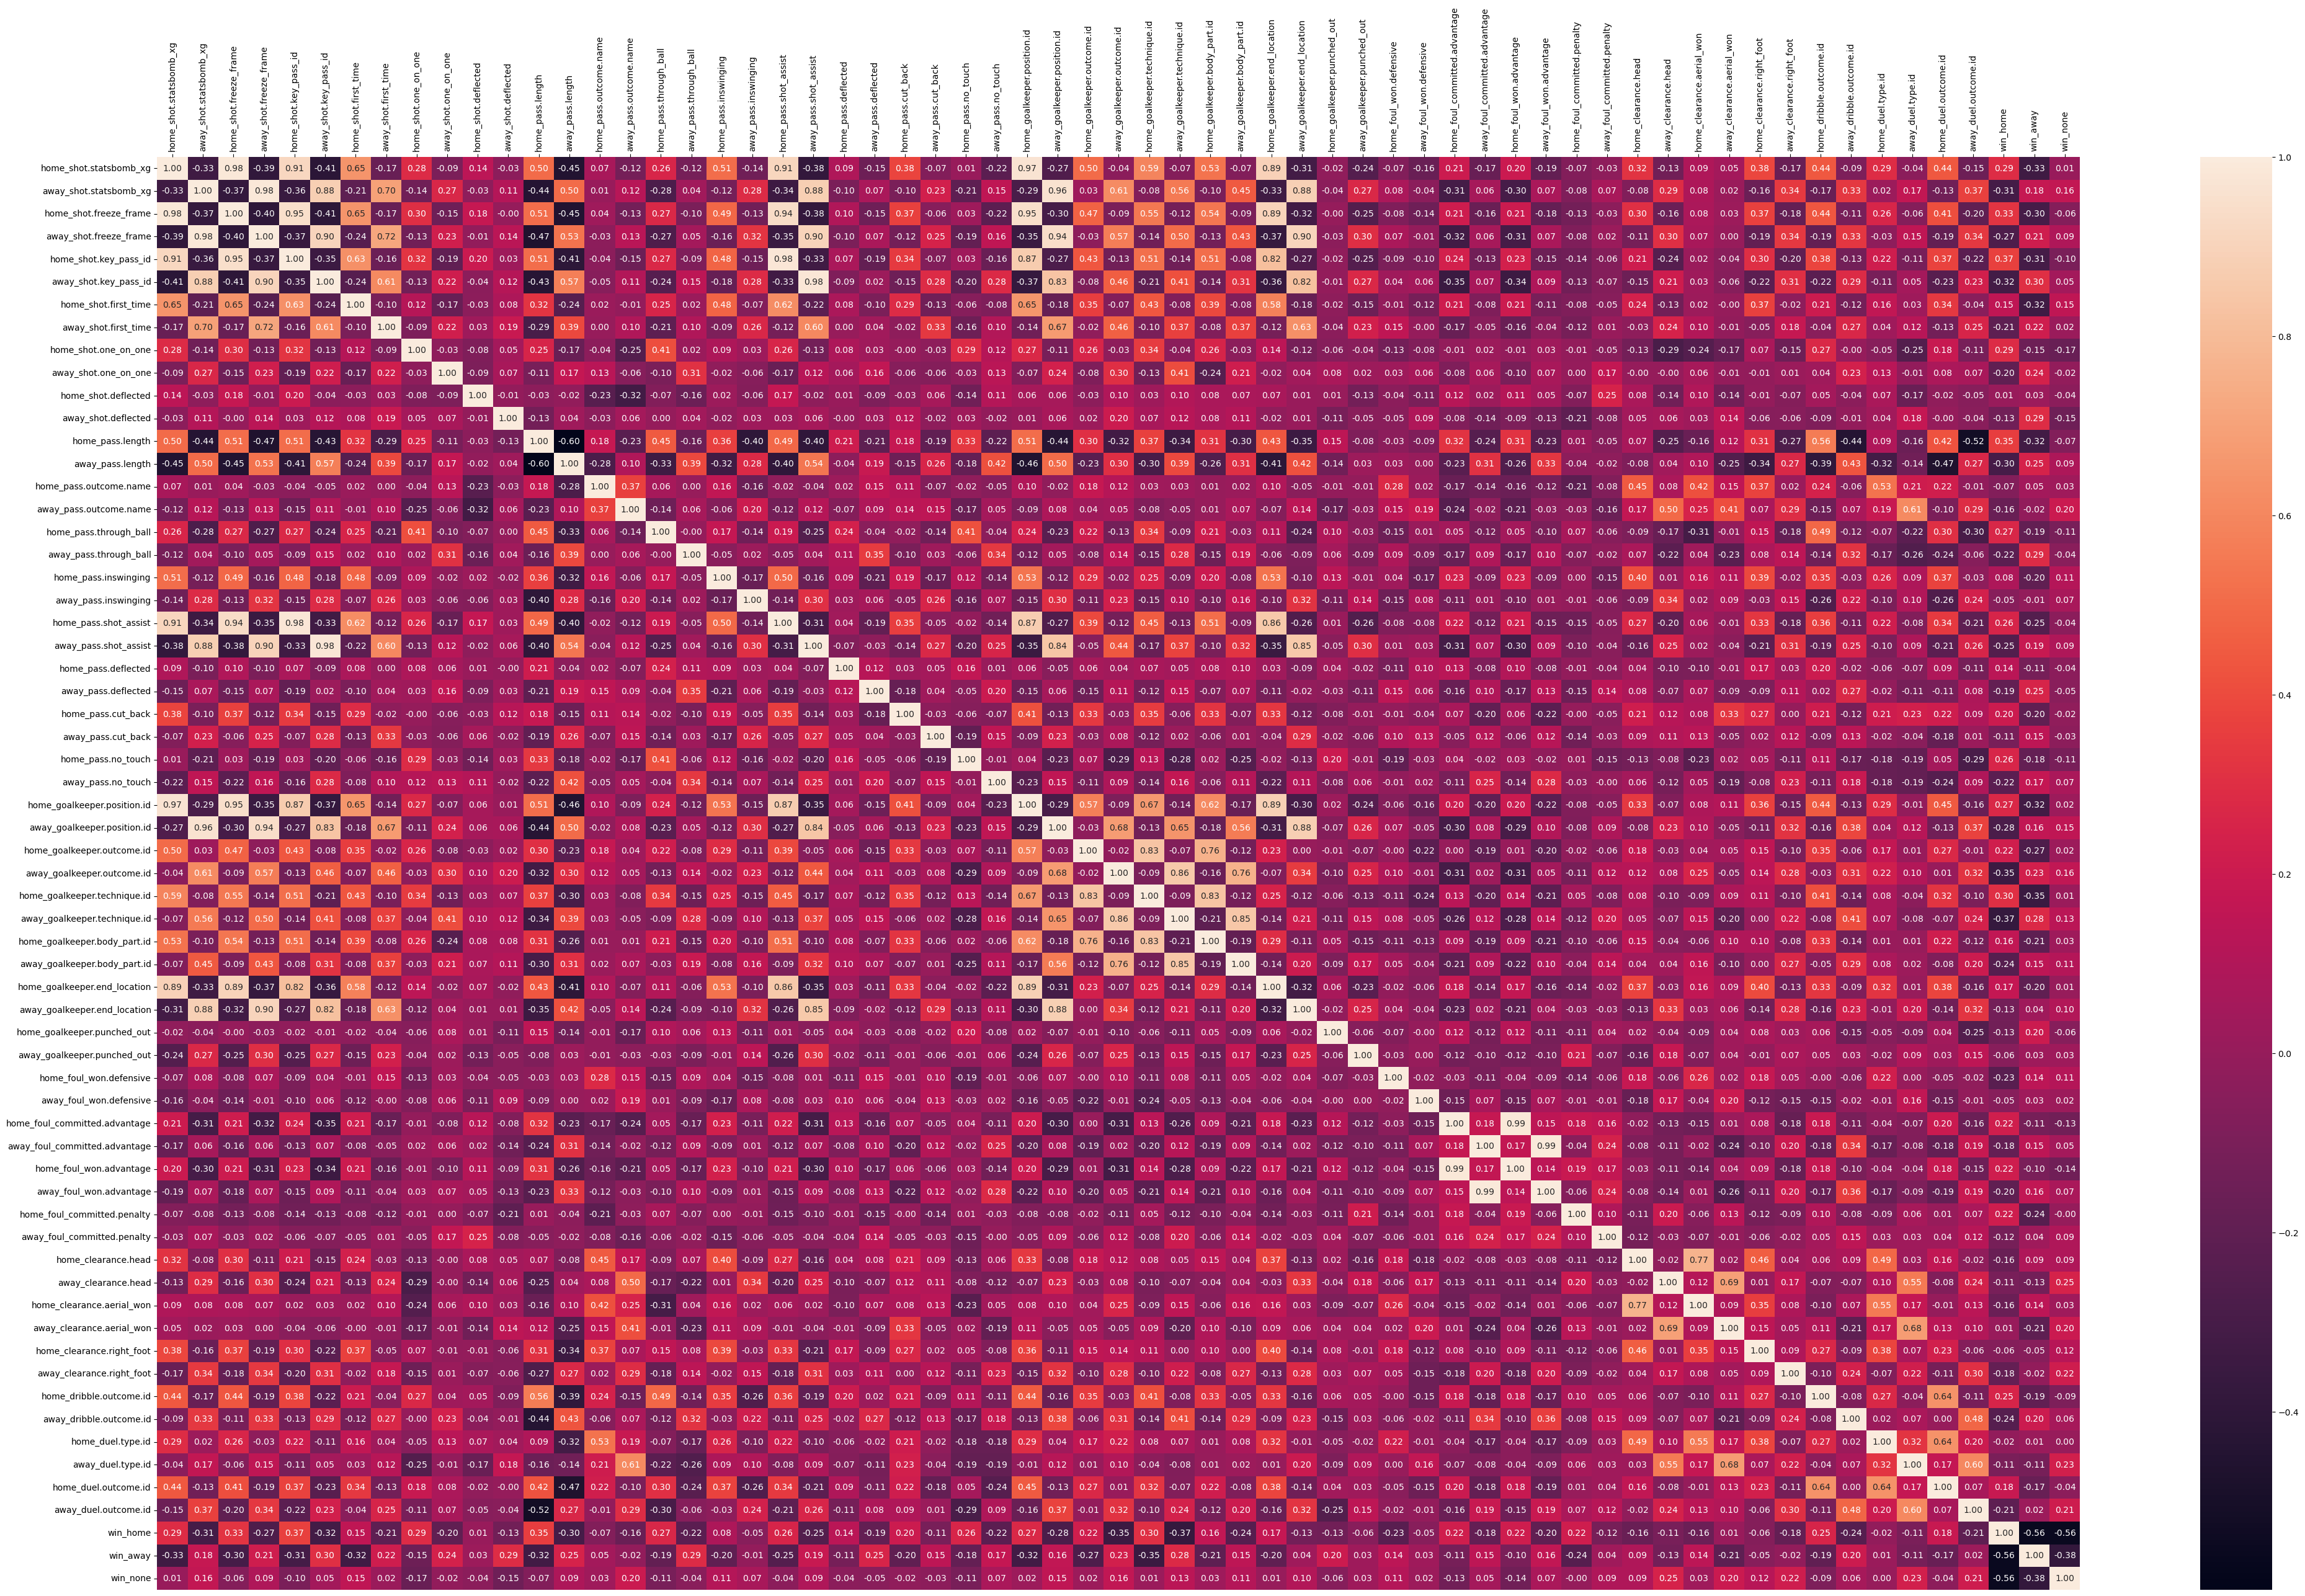

In [45]:
# Print heatmap input-output matrix: (feature set starts at column 42)
X_y = matches.iloc[:,42:]
plt.figure(figsize=(50, 30))
ax = sns.heatmap(X_y.corr(), annot=True, fmt=".2f");
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation=90) 
plt.savefig("Heatmap_mixed-type.png", dpi=300, bbox_inches='tight')

In [46]:
# Determine columns for input (X) and output (y) for Classifiers/Regressors:
X = matches.iloc[:,42:-3] # statistics columns, starting with column 42, excluding the last 3 columns (win_home, win_none, win_away, see below!)
y = matches[["win_home", "win_none", "win_away"]] # result columns (home win/away win/draw)

In [47]:
X

,home_shot.statsbomb_xg,away_shot.statsbomb_xg,home_shot.freeze_frame,away_shot.freeze_frame,home_shot.key_pass_id,away_shot.key_pass_id,home_shot.first_time,away_shot.first_time,home_shot.one_on_one,away_shot.one_on_one,...,home_clearance.aerial_won,away_clearance.aerial_won,home_clearance.right_foot,away_clearance.right_foot,home_dribble.outcome.id,away_dribble.outcome.id,home_duel.type.id,away_duel.type.id,home_duel.outcome.id,away_duel.outcome.id
0,13,12,13,12,7,6,4,3,3,0,...,1,3,5,5,21,8,28,24,23,13
1,10,6,9,6,6,5,2,3,1,0,...,1,2,4,2,28,8,31,21,26,7
2,10,18,10,18,8,14,4,6,0,0,...,0,4,5,7,11,25,17,37,13,26
3,9,17,9,17,7,13,3,6,0,0,...,1,5,4,4,19,15,20,22,16,10
4,9,11,9,11,7,9,3,3,2,0,...,0,3,6,5,18,14,20,29,14,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,20,6,20,6,16,4,8,1,1,0,...,5,0,4,2,12,11,27,26,14,15
112,7,16,7,16,2,6,5,7,0,0,...,4,7,4,5,11,13,31,48,11,22
113,20,13,20,13,14,8,5,4,1,0,...,6,9,6,4,13,13,33,47,18,15
114,6,12,6,12,4,9,2,2,0,0,...,5,4,2,5,9,15,43,44,18,23


In [48]:
X.notna().sum()

home_shot.statsbomb_xg           116
away_shot.statsbomb_xg           116
home_shot.freeze_frame           116
away_shot.freeze_frame           116
home_shot.key_pass_id            116
away_shot.key_pass_id            116
home_shot.first_time             116
away_shot.first_time             116
home_shot.one_on_one             116
away_shot.one_on_one             116
home_shot.deflected              116
away_shot.deflected              116
home_pass.length                 116
away_pass.length                 116
home_pass.outcome.name           116
away_pass.outcome.name           116
home_pass.through_ball           116
away_pass.through_ball           116
home_pass.inswinging             116
away_pass.inswinging             116
home_pass.shot_assist            116
away_pass.shot_assist            116
home_pass.deflected              116
away_pass.deflected              116
home_pass.cut_back               116
away_pass.cut_back               116
home_pass.no_touch               116
a

In [49]:
y

,win_home,win_none,win_away
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
111,1,0,0
112,0,0,1
113,1,0,0
114,0,1,0


## Scaling

In [50]:
# Scale input (statistics) columns using MinMaxScaler (to get values between 0 and 1):
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
X_scaled

array([[0.33333333, 0.44      , 0.33333333, ..., 0.20408163, 0.54545455,
        0.31818182],
       [0.24242424, 0.2       , 0.21212121, ..., 0.14285714, 0.63636364,
        0.04545455],
       [0.24242424, 0.68      , 0.24242424, ..., 0.46938776, 0.24242424,
        0.90909091],
       ...,
       [0.54545455, 0.48      , 0.54545455, ..., 0.67346939, 0.39393939,
        0.40909091],
       [0.12121212, 0.44      , 0.12121212, ..., 0.6122449 , 0.39393939,
        0.77272727],
       [0.51515152, 0.36      , 0.51515152, ..., 0.06122449, 0.60606061,
        0.27272727]])

In [52]:
# Perform split into training and testing set using 80%-20% split using standard train_test_split function of sklearn:
X_train, X_test, y_train, y_test = tts(X_scaled, y, test_size=0.15, random_state=0)

In [53]:
y_test

,win_home,win_none,win_away
10,1,0,0
74,1,0,0
66,0,0,1
51,0,0,1
7,1,0,0
78,1,0,0
92,0,1,0
90,1,0,0
107,0,0,1
62,0,0,1


## 3. Supervised Learning: Multi-output classifiers and regressors

In [54]:
def randomClassification(prob1=33, prob2=33, prob3=33, verbose=0):
    '''
    Naive classifier which randomly selects one of the possible results.
    
    Parameters:
    IN:
    - prob1: (int) Probability of the 1st prediction [1, 0, 0]
    - prob2: (int) Probability of the 1st prediction [0, 1, 0]
    - prob3: (int) Probability of the 1st prediction [0, 0, 1]
    - verbose: (int) Parameter to toggle screen outputs on (if >0)
    
    OUT:
    - rand_result: (array) The result of the classification, i.e. the results (output) vector of this prediction
    '''
    random_number = random.randint(1, prob1+prob2+prob3)
    
    if (random_number <= prob1):
        rand_result = [1, 0, 0]
    elif (random_number > prob1 and random_number <= prob1+prob2):
        rand_result = [0, 1, 0]
    else:
        rand_result = [0, 0, 1]
    if (verbose > 0):
        print(random_number,"=>",rand_result)
    return rand_result

In [147]:
# Check predication results of one of the ML classifiers:
X_train, X_test, y_train, y_test = tts(X_scaled, y, test_size=0.2, random_state=45)
clf_test = MultiOutputClassifier(LogisticRegression(random_state=0)).fit(X_train, y_train)
y_pred = clf_test.predict(X_test)
print(y_pred)
# Problem: many [0 0 0] rows, i.e. none of the 3 possible results (home win, draw, away win) predicted!!! 
# Moreover, a row [0 1 1] where more than one possible result (draw _and_ away win) was predicted by the classifier!!!
# -> We call this a 'non-unique' classification in the project paper / blog post!

[[0 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 1]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 0]]


In [56]:
def correct_results(y_pred):
    '''
    Corrects the result of continuous multioutput regression by choosing the maximum value 
    and setting the [home_win, draw, loss_win] row correspondingly to binary values:
    - If 1st value is maximum, prediction is home_win, i.e. [1, 0, 0] for row
    - If 2nd value is maximum, prediction is draw, i.e. [0, 1, 0] for row
    - If 3rd value is maximum, prediction is away_win, i.e. [0, 0, 1] for row
    
    IN:
    - y_pred: The continuous multioutput prediction of MultiOutputRegressor
    
    OUT:
    - y_pred: The binary encoded, corrected prediction of MultiOutputRegressor with exactly _one_ value of 1 per row
    '''
    for idx in range(len(y_pred)):
        row_max = np.max(y_pred[idx]) 
        if (row_max == y_pred[idx][0]):
            y_pred[idx] = [1, 0, 0]
        elif (row_max == y_pred[idx][1]):
            y_pred[idx] = [0, 1, 0]
        else:
            y_pred[idx] = [0, 0, 1]
    return y_pred

In [57]:
def show_values(pc, fmt='%.2f', **kw): #"%.2f"
    '''
    Heatmap with text in each cell using matplotlib's pyplot
    Inspired by https://stackoverflow.com/a/25074150/395857, but optimized and tailored to our problem
    '''
    pc.update_scalarmappable()
    ax = pc.axes
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        color = (0.0, 0.0, 0.0) # all black
        ax.text(y, x, value[0], ha="center", va="center", size=16, color=color, **kw) # Precision
        ax.text(y+1, x, value[1], ha="center", va="center", size=16, color=color, **kw) # Recall
        ax.text(y+2, x, value[2], ha="center", va="center", size=16, color=color, **kw) # F1
        ax.text(y+3, 1.5, value[3], ha="center", va="center", size=32, color=color, rotation=90, **kw) # Accuracy

def cm2inch(*tupl):
    '''
    Specify figure size in centimeters in matplotlib
    '''
    inch = 2.54 # Factor between inch and centimeters
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    fig.set_size_inches(cm2inch(figure_width, figure_height))
    
def plot_classification_report(classification_report, title='unknown', t_ratio='unknown', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 with adaptation to our problem 
    and added extra column for the accuracy score.
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]: # - 4
        t = line.strip().split()
        if len(t) < 2: continue 
        # Decode results:
        if (t[0] == '100'):
            t[0] = 'win_home'
        elif (t[0] == '10'):
            t[0] = 'draw'
        elif (t[0] == '1'):
            t[0] = 'win_away'
        elif (t[0] == 'accuracy'):
            t[0] = 'accuracy'
        else:
            continue # only plot correct rows, i.e. win_home->[1,0,0], draw->[0,1,0] or win_away->[0,0,1]
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        if (len(v) == 1):
            plotMat[0] += v # add accuracy to 1st row
            plotMat[1] += v # add accuracy to 1st row
            plotMat[2] += v # add accuracy to 1st row
        else:
            plotMat.append(v) # add row
            support.append(int(t[-1]))
        class_names.append(t[0])
        #print("v=",v,"len=",len(v))

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score', 'Accuracy']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    title = 'Classification report for {alg}, testRatio(s)={tr}'.format(alg=title, tr=t_ratio)
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)
    plt.savefig("./img/CR_{alg}.png".format(alg=title, tr=t_ratio), dpi=300, bbox_inches='tight')

In [58]:
def print_classification_results(y_test_all, y_pred0_all, y_pred1_all, y_pred2_all
                               , y_pred3_all, y_pred4_all, y_pred5_all, y_pred6_all, test_ratio):
    '''
    tbd - docstring
    '''
    
    algo_names = ['RandomClassifier', 'MOC_LogisticRegression', 'MOC_RandomForests', 'MOC_DecTree', 
                  'MOR_GradBoo', 'MOR_SGD', 'MOR_Ridge']
    y_test = pd.DataFrame(y_test_all)
    y_pred_all = [y_pred0_all, y_pred1_all, y_pred2_all, y_pred3_all
            , y_pred4_all, y_pred5_all, y_pred6_all]
    cr = []
    
    # Accuracy: EACH VALUE of a row must be correct (i.e., [1,0,0] if home team wins; [0,1,0] if draw; [0,0,1] if away team wins)
    y_test['score'] = 100*y_test[0] + 10*y_test[1] + 1*y_test[2]
    for id in range(len(y_pred_all)):
        y_pred = pd.DataFrame(y_pred_all[id])
        y_pred['score'] = 100*y_pred[0] + 10*y_pred[1] + 1*y_pred[2]
        cr = classification_report(y_test['score'], y_pred['score'], zero_division=0)
        print("CLASS REPORT:\n",cr)
        plot_classification_report(cr, title=algo_names[id], t_ratio=test_ratio)
    
    return

## Evaluation


#Matches: 116 _ test_ratio= 0.1 _ init_random_State= 100 _ #tests= 300
Completed in 139.9 sec

#Matches: 116 _ test_ratio= 0.15 _ init_random_State= 100 _ #tests= 300
Completed in 136.9 sec

#Matches: 116 _ test_ratio= 0.2 _ init_random_State= 100 _ #tests= 300
Completed in 137.3 sec

#Matches: 116 _ test_ratio= 0.25 _ init_random_State= 100 _ #tests= 300
Completed in 136.2 sec

#Matches: 116 _ test_ratio= 0.3 _ init_random_State= 100 _ #tests= 300
Completed in 156.1 sec

#Matches: 116 _ test_ratio= 0.35 _ init_random_State= 100 _ #tests= 300
Completed in 133.3 sec

#Matches: 116 _ test_ratio= 0.4 _ init_random_State= 100 _ #tests= 300
Completed in 143.2 sec

#Matches: 116 _ test_ratio= 0.45 _ init_random_State= 100 _ #tests= 300
Completed in 126.3 sec

#Matches: 116 _ test_ratio= 0.5 _ init_random_State= 100 _ #tests= 300
Completed in 131.0 sec
CLASS REPORT:
               precision    recall  f1-score   support

           1       0.29      0.34      0.31     26501
          10     

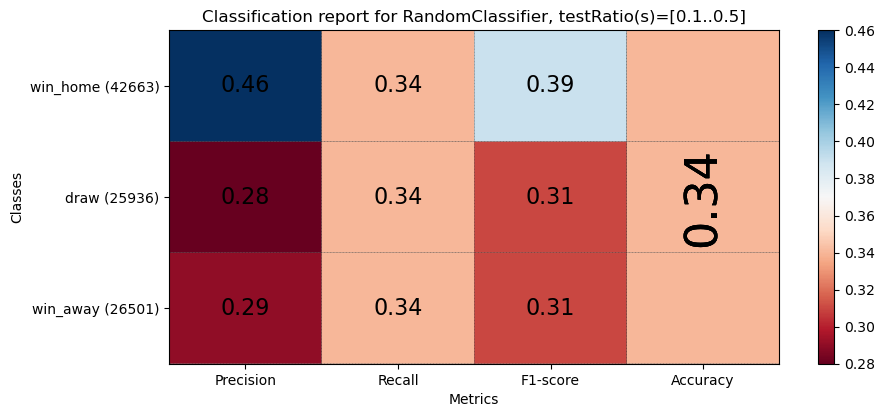

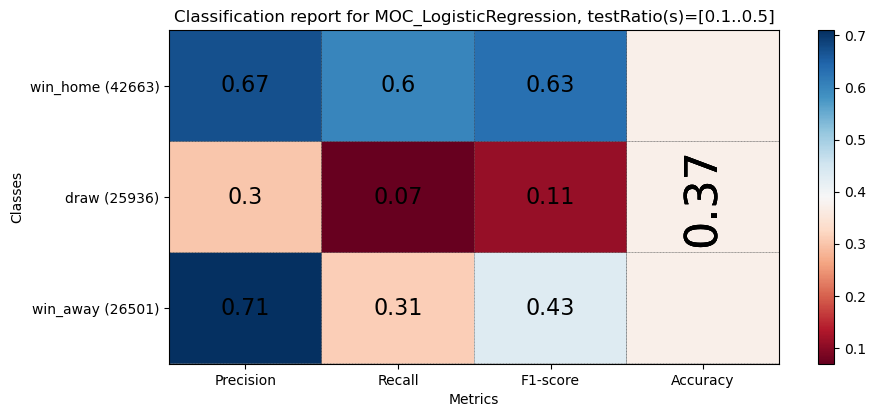

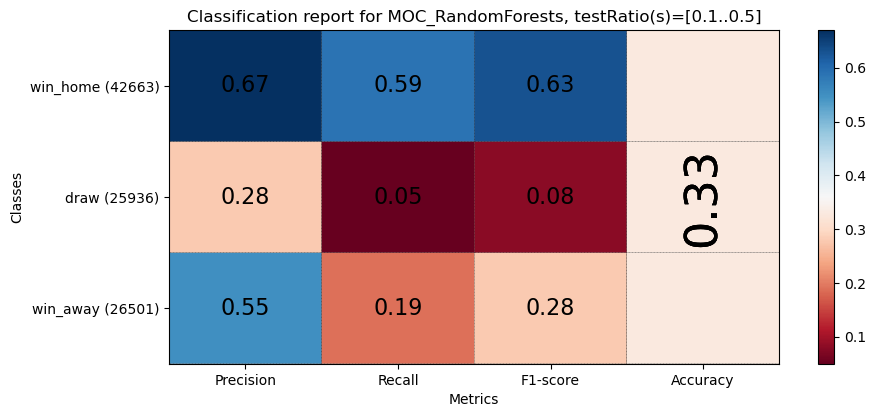

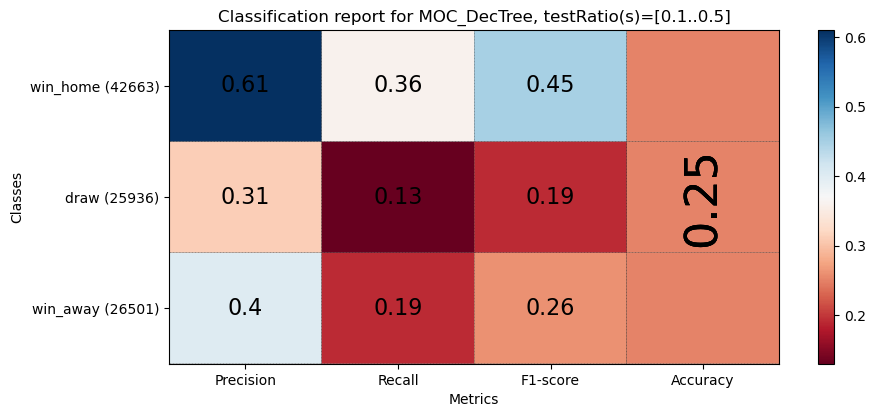

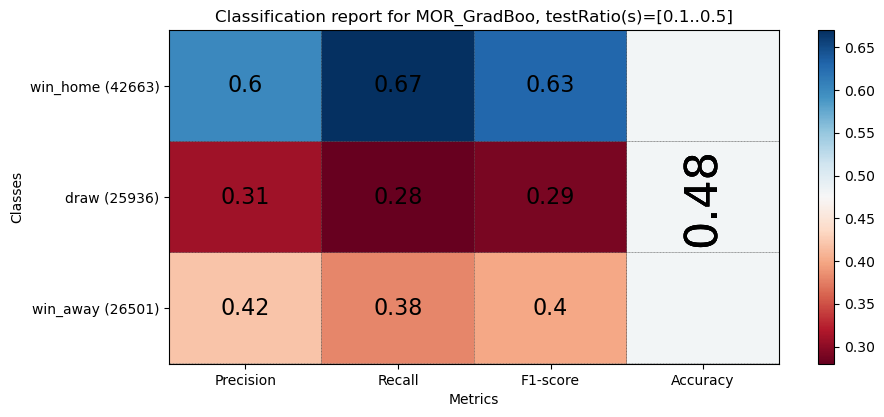

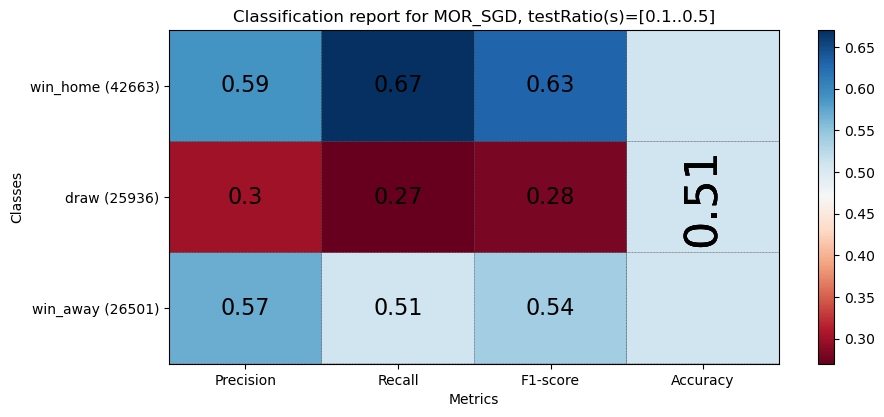

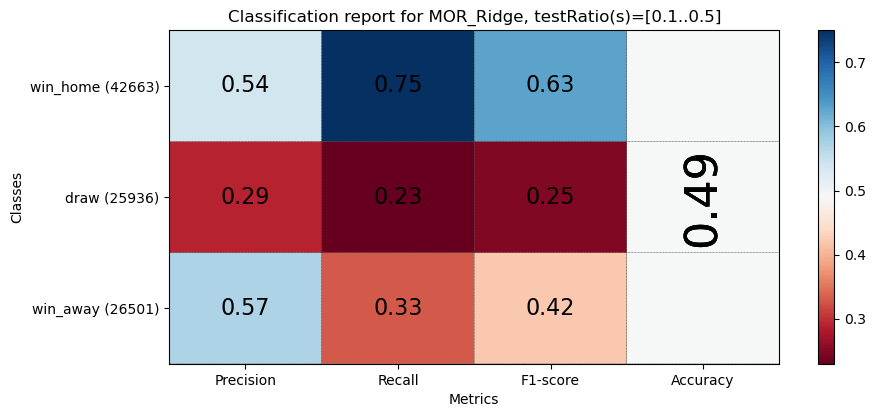

In [113]:
import time

acc = dict()  # Stores the accuracy scores per test-ratio
acc_mean = dict() # Mean accuracy score per test-ratio

test_ratios = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
num_matches = len(matches)
test_numbers = 300

verbose = 1

start = time.time()

y_test_all, y_pred0_all = [], [] 
y_pred1_all, y_pred2_all, y_pred3_all = [], [], []
y_pred4_all, y_pred5_all, y_pred6_all = [], [], []

src_name = str('StdRandomizedClassifier')#+str(test_ratio))
moc_lr_name = str('MultiOutputClass_LogisticRegression')#+str(test_ratio))
moc_rf_name = str('MultiOutputClass_RandomForest')#+str(test_ratio))
moc_dt_name = str('MultiOutputClass_DecisionTree')#+str(test_ratio))
mor_gb_name = str('MultiOutputReg_GradientBoost')#+str(test_ratio))
mor_ri_name = str('MultiOutputReg_Ridge')#+str(test_ratio))
mor_sgd_name = str('MultiOutputReg_SGD')#+str(test_ratio))
    
acc_mean[src_name], acc_mean[moc_lr_name] = [], [] 
acc_mean[moc_rf_name], acc_mean[moc_dt_name], acc_mean[mor_gb_name] = [], [], []
acc_mean[mor_ri_name], acc_mean[mor_sgd_name] = [], []
    
for test_ratio in test_ratios:
    random_State = 100
    init_rand = random_State
    

    acc[src_name], acc[moc_lr_name] = [], [] 
    acc[moc_rf_name], acc[moc_dt_name], acc[mor_gb_name] = [], [], []
    acc[mor_ri_name], acc[mor_sgd_name] = [], []
    
    print("\n#Matches:",num_matches,"_ test_ratio=",test_ratio,"_ init_random_State=",init_rand,"_ #tests=",test_numbers)
    start2 = time.time()
    for test_number in range(test_numbers):
                    
        X_train, X_test, y_train, y_test = tts(X_scaled, y, test_size=test_ratio, random_state=random_State)

        # 1. StdRandomClassifier:
        y_pred0 = []
        random.seed(random_State)
        corr_pred = 0
        for i in range(len(y_test)):
            y_pred0.append(randomClassification()) # totally random with 1/3 probability for each class
            pred = np.array(y_pred0[i])
            test = np.array(y_test.iloc[i])
            if (pred[0] == test[0] and pred[1] == test[1] and pred[2] == test[2]):
                corr_pred += 1
        accu = np.round(corr_pred/len(y_test), 3) # Calculate accuracy as number of correct predictions divided by all predictions
        acc[src_name].append(accu)
        
        # 2. MultiOutputClassifier with estimator LogisticRegression:
        clf1 = MultiOutputClassifier(LogisticRegression(random_state=random_State)).fit(X_train, y_train)
        y_pred1 = clf1.predict(X_test)
        corr_pred = 0   
        for i in range(len(y_test)):
            pred = np.array(y_pred1[i])
            test = np.array(y_test.iloc[i]) 
            if (pred[0] == test[0] and pred[1] == test[1] and pred[2] == test[2]):
                corr_pred += 1
        accu = np.round(corr_pred/len(y_test), 3) # Calculate accuracy as number of correct predictions divided by all predictions
        acc[moc_lr_name].append(accu)
        
        # 3. MultiOutputClassifier with estimator RandomForestClassifier:
        clf2 = MultiOutputClassifier(RandomForestClassifier(random_state=random_State)).fit(X_train, y_train)
        y_pred2 = clf2.predict(X_test)
        corr_pred = 0   
        for i in range(len(y_test)):
            pred = np.array(y_pred2[i])
            test = np.array(y_test.iloc[i]) 
            if (pred[0] == test[0] and pred[1] == test[1] and pred[2] == test[2]):
                corr_pred += 1
        accu = np.round(corr_pred/len(y_test), 3) # Calculate accuracy as number of correct predictions divided by all predictions
        acc[moc_rf_name].append(accu)
        
        # 4. MultiOutputClassifier with estimator DecisionTreeClassifier:
        clf3 = MultiOutputClassifier(DecisionTreeClassifier(random_state=random_State)).fit(X_train, y_train)
        y_pred3 = clf3.predict(X_test)
        corr_pred = 0   
        for i in range(len(y_test)):
            pred = np.array(y_pred3[i])
            test = np.array(y_test.iloc[i]) 
            if (pred[0] == test[0] and pred[1] == test[1] and pred[2] == test[2]):
                corr_pred += 1
        accu= np.round(corr_pred/len(y_test), 3) # Calculate accuracy as number of correct predictions divided by all predictions
        acc[moc_dt_name].append(accu)
        
        # 5. MultiOutputRegressor with estimator GradientBoostingRegressor and correction of continuous multioutput predictions:
        clf4 = MultiOutputRegressor(GradientBoostingRegressor(random_state=random_State)).fit(X_train, y_train)
        # Continuous(!) prediction of MultiOutputRegressor:
        y_pred4 = clf4.predict(X_test)
        # Corrected, binary-encoded prediction:
        y_pred4 = correct_results(y_pred4)
        corr_pred = 0   
        for i in range(len(y_test)):
            pred = np.array(y_pred4[i])
            test = np.array(y_test.iloc[i]) 
            if (pred[0] == test[0] and pred[1] == test[1] and pred[2] == test[2]):
                corr_pred += 1
        accu = np.round(corr_pred/len(y_test), 3) # Calculate accuracy as number of correct predictions divided by all predictions
        acc[mor_gb_name].append(accu)
        
        # 6. MultiOutputRegressor with estimator Ridge and correction of continuous multioutput predictions:
        clf5 = MultiOutputRegressor(Ridge(random_state=random_State)).fit(X_train, y_train)
        # Continuous(!) prediction of MultiOutputRegressor:
        y_pred5 = clf5.predict(X_test)
        # Corrected, binary-encoded prediction:
        y_pred5 = correct_results(y_pred5)
        corr_pred = 0   
        for i in range(len(y_test)):
            pred = np.array(y_pred5[i])
            test = np.array(y_test.iloc[i]) 
            if (pred[0] == test[0] and pred[1] == test[1] and pred[2] == test[2]):
                corr_pred += 1
        accu = np.round(corr_pred/len(y_test), 3) # Calculate accuracy as number of correct predictions divided by all predictions
        acc[mor_ri_name].append(accu)
        
        # 7. MultiOutputRegressor with estimator SGDClassifier and correction of continuous multioutput predictions:
        clf6 = MultiOutputRegressor(SGDClassifier(random_state=random_State)).fit(X_train, y_train)
        # Continuous(!) prediction of MultiOutputRegressor:
        y_pred6 = clf6.predict(X_test)
        # Corrected, binary-encoded prediction:
        y_pred6 = correct_results(y_pred6)
        corr_pred = 0   
        for i in range(len(y_test)):
            pred = np.array(y_pred6[i])
            test = np.array(y_test.iloc[i]) 
            if (pred[0] == test[0] and pred[1] == test[1] and pred[2] == test[2]):
                corr_pred += 1
        accu = np.round(corr_pred/len(y_test), 3) # Calculate accuracy as number of correct predictions divided by all predictions
        acc[mor_sgd_name].append(accu)
        
        # Concatenate Vectors, for Classification Report later on:
        if (len(y_test_all) == 0): # if 1st iteration
            y_test_all = y_test 
            y_pred0_all = y_pred0 
            y_pred1_all = y_pred1
            y_pred2_all = y_pred2
            y_pred3_all = y_pred3
            y_pred4_all = y_pred4
            y_pred5_all = y_pred5
            y_pred6_all = y_pred6
        else: # From 2nd iteration on, concatenate...
            y_test_all = np.concatenate((y_test_all, y_test), axis=0)
            y_pred0_all = np.concatenate((y_pred0_all, y_pred0), axis=0)
            y_pred1_all = np.concatenate((y_pred1_all, y_pred1), axis=0)
            y_pred2_all = np.concatenate((y_pred2_all, y_pred2), axis=0)
            y_pred3_all = np.concatenate((y_pred3_all, y_pred3), axis=0) 
            y_pred4_all = np.concatenate((y_pred4_all, y_pred4), axis=0)
            y_pred5_all = np.concatenate((y_pred5_all, y_pred5), axis=0)
            y_pred6_all = np.concatenate((y_pred6_all, y_pred6), axis=0)
            
        random_State += 1
    
    # Update accuracies:
    acc_mean[src_name].append(np.round(np.mean(acc[src_name]), 3))
    acc_mean[moc_lr_name].append(np.round(np.mean(acc[moc_lr_name]), 3))
    acc_mean[moc_rf_name].append(np.round(np.mean(acc[moc_rf_name]), 3))
    acc_mean[moc_dt_name].append(np.round(np.mean(acc[moc_dt_name]), 3))
    acc_mean[mor_gb_name].append(np.round(np.mean(acc[mor_gb_name]), 3))
    acc_mean[mor_ri_name].append(np.round(np.mean(acc[mor_ri_name]), 3))
    acc_mean[mor_sgd_name].append(np.round(np.mean(acc[mor_sgd_name]), 3))
    
    end2 = time.time()
    if (verbose == 1):
        print("Completed in",np.round(end2-start2, 1),"sec")

# Print summarizing classification results for all test ratios:
print_classification_results(y_test_all, y_pred0_all, y_pred1_all, y_pred2_all
                           , y_pred3_all, y_pred4_all, y_pred5_all, y_pred6_all
                           , '[0.1..0.5]')

end = time.time()
print("Time needed:",np.round(end-start, 1),"sec")


In [120]:
print("AVERAGE ACCURACY PER TEST_RATIO:")
print(src_name,"->",acc_mean[src_name],"->",np.round(np.mean(acc_mean[src_name]), 3))
print(moc_lr_name,"->",acc_mean[moc_lr_name],"->",np.round(np.mean(acc_mean[moc_lr_name]), 3))
print(moc_rf_name,"->",acc_mean[moc_rf_name],"->",np.round(np.mean(acc_mean[moc_rf_name]), 3))
print(moc_dt_name,"->",acc_mean[moc_dt_name],"->",np.round(np.mean(acc_mean[moc_dt_name]), 3))
print(mor_gb_name,"->",acc_mean[mor_gb_name],"->",np.round(np.mean(acc_mean[mor_gb_name]), 3))
print(mor_sgd_name,"->",acc_mean[mor_sgd_name],"->",np.round(np.mean(acc_mean[mor_sgd_name]), 3))
print(mor_ri_name,"->",acc_mean[mor_ri_name],"->",np.round(np.mean(acc_mean[mor_ri_name]), 3))

AVERAGE ACCURACY PER TEST_RATIO:
StdRandomizedClassifier -> [0.35, 0.35, 0.35, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34] -> 0.343
MultiOutputClass_LogisticRegression -> [0.39, 0.39, 0.38, 0.39, 0.38, 0.38, 0.37, 0.36, 0.36] -> 0.378
MultiOutputClass_RandomForest -> [0.33, 0.34, 0.34, 0.33, 0.33, 0.33, 0.33, 0.32, 0.32] -> 0.33
MultiOutputClass_DecisionTree -> [0.27, 0.27, 0.26, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25] -> 0.256
MultiOutputReg_GradientBoost -> [0.51, 0.51, 0.49, 0.49, 0.49, 0.48, 0.47, 0.47, 0.47] -> 0.487
MultiOutputReg_Ridge -> [0.51, 0.5, 0.5, 0.5, 0.49, 0.49, 0.49, 0.48, 0.49] -> 0.494
MultiOutputReg_SGD -> [0.53, 0.53, 0.53, 0.52, 0.52, 0.51, 0.51, 0.51, 0.51] -> 0.519


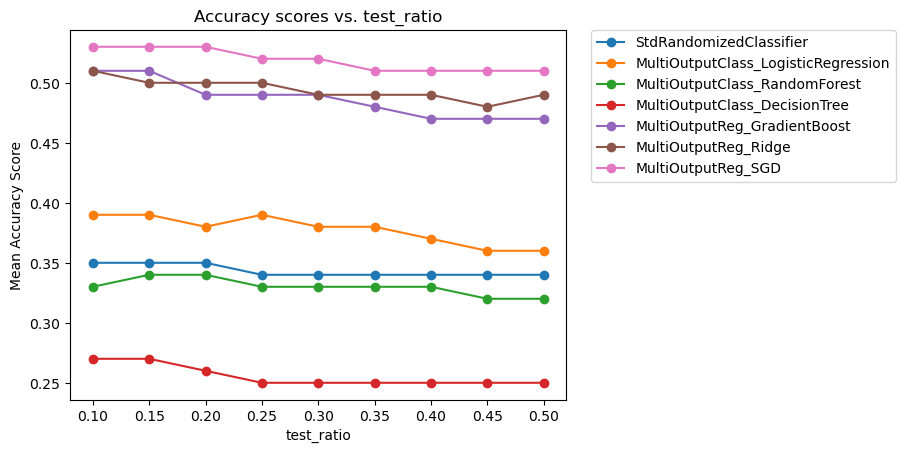

In [141]:
# Plotting the Accuracy data:
plt.plot(test_ratios, acc_mean[src_name], label=src_name, marker='o')
plt.plot(test_ratios, acc_mean[moc_lr_name], label=moc_lr_name, marker='o')
plt.plot(test_ratios, acc_mean[moc_rf_name], label=moc_rf_name, marker='o')
plt.plot(test_ratios, acc_mean[moc_dt_name], label=moc_dt_name, marker='o')
plt.plot(test_ratios, acc_mean[mor_gb_name], label=mor_gb_name, marker='o')
plt.plot(test_ratios, acc_mean[mor_ri_name], label=mor_ri_name, marker='o')
plt.plot(test_ratios, acc_mean[mor_sgd_name], label=mor_sgd_name, marker='o')

# Adding labels, title and legend:
plt.xlabel('test_ratio')
plt.ylabel('Mean Accuracy Score')
plt.title('Accuracy scores vs. test_ratio')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Displaying and saving the plot:
plt.show()
#plt.savefig("./img/Accuracy_vs_test_ratio.png", dpi=300, bbox_inches='tight')